In [221]:
import numpy as np
import matplotlib as plt

what is a state X?

$X = (x, y, \theta, m_{1,x}, m_{1,y}, ...., m_{n,x}, m_{n,y}$)$^T$

$m_i$ = landmark i

In [222]:
N = 5 #no of landmarks
inf = 1e6
dt = 0.1
mu0 = np.zeros((2*N+3)).T
sigXX = np.zeros((3,3))
sigXM = np.zeros((3,2*N))
sigMX = np.zeros((2*N,3))
sigMM = np.eye(2*N)*inf
sig0 = np.vstack((np.hstack((sigXX, sigXM)), np.hstack((sigMX, sigMM))))
print(mu0)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [226]:
#generate random input sequence (according to velocity model)
def gen_U(num_steps, v_max=10, w_max=5):

    v = np.random.uniform(-v_max, v_max, num_steps)
    w = np.random.uniform(-w_max, w_max, num_steps)
    u = np.column_stack((v,w))
    return u

u = gen_U(50)
    

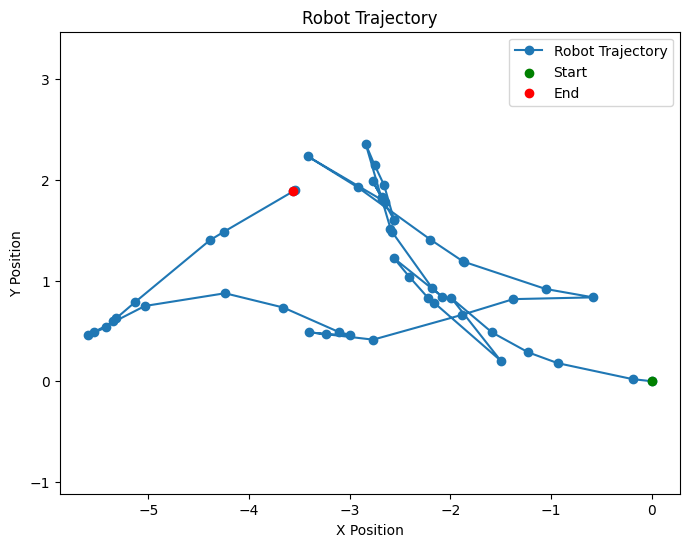

In [224]:
import matplotlib.pyplot as plt

def plot_robot_trajectory(mu0, u, dt):
    """
    Plots the trajectory of the robot based on the given controls.
    
    Parameters:
    - mu0: Initial state of the robot (x, y, theta).
    - u: Control inputs (velocity and angular velocity).
    - dt: Time step for each control input.
    """
    # Initialize the state
    x, y, theta = mu0[0], mu0[1], mu0[2]
    trajectory = [(x, y)]  # Store the trajectory

    # Simulate the motion
    for v, w in u:
        if w != 0:
            # Update state using velocity model
            x += -v / w * np.sin(theta) + v / w * np.sin(theta + w * dt)
            y += v / w * np.cos(theta) - v / w * np.cos(theta + w * dt)
            theta += w * dt
        else:
            # Handle straight-line motion (w = 0)
            x += v * dt * np.cos(theta)
            y += v * dt * np.sin(theta)
        
        trajectory.append((x, y))

    # Extract x and y coordinates for plotting
    x_coords, y_coords = zip(*trajectory)

    # Plot the trajectory
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', label='Robot Trajectory')
    plt.scatter(x_coords[0], y_coords[0], color='green', label='Start', zorder=5)
    plt.scatter(x_coords[-1], y_coords[-1], color='red', label='End', zorder=5)
    plt.title('Robot Trajectory')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Example usage
plot_robot_trajectory(mu0=np.array([0, 0, 0]), u=u, dt=dt)

In [ ]:
def ekf(mu, cov, u, Rt):
    
    def predict():
        v,w = u[0], u[1]
        ratio = v/w
        motion = np.array([[-ratio*np.sin(mu[2]) + ratio*np.sin(mu[2]+w*dt)], [ratio*np.cos(mu[2]) - ratio*np.cos(mu[2]+w*dt)], [w*dt]])
        #to map to 2N+3 dimensions
        F = np.hstack((np.eye(3),np.zeros((3,2*N)))).T
        #predict mu
        mu_pred = mu + F@motion.flat
        #get jacobian of motion model
        Gx = np.eye(3) + np.array(([[0,0,-ratio*np.cos(mu[2]) + ratio*np.cos(mu[2]+dt)], [0,0,-ratio*np.sin(mu[2]) + ratio*np.sin(mu[2]+w*dt)], [0,0,0]]))
        #to map to 2N+3 dimensions
        Gt = np.vstack((np.hstack((Gx,np.zeros((3,2*N)))), np.hstack((np.zeros((2*N,3)), np.eye(2*N)))))
        cov_pred = Gt@cov@Gt.T + Rt

        return mu_pred, cov_pred
    
    def correct():
        pass

ekf(mu0, sig0, u[0], np.random.normal(0,0.1,2*N+3))
